In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Условие 1: Задача 1

- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

1.1. Скачать следующие данные: kc-house-data и laptop_price

In [3]:
df_house = pd.read_csv('kc_house_data.csv', encoding = '1251', parse_dates=['date'],dayfirst=False)

In [4]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [5]:
df_laptop = pd.read_csv('laptop_price.csv', encoding = '1251', index_col='laptop_ID')

1.2. Изучите стоимости недвижимости

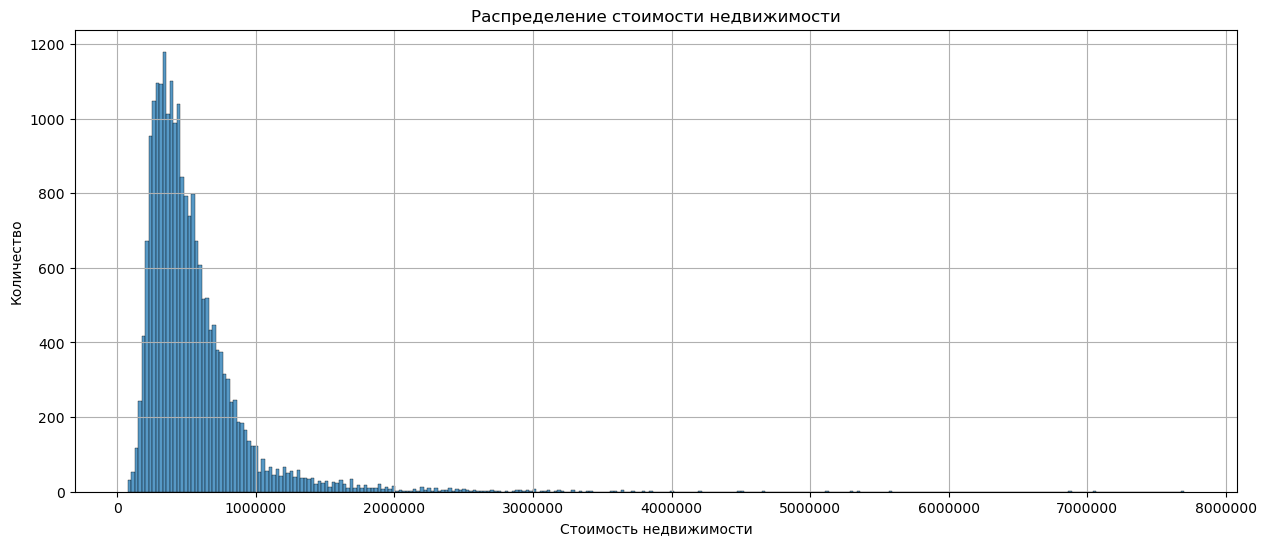

In [21]:
plt.figure(figsize=(15, 6))
sns.histplot(df_house['price'], bins=300)
plt.ticklabel_format(style='plain')
plt.xlabel('Стоимость недвижимости')
plt.ylabel('Количество')
plt.title('Распределение стоимости недвижимости')
plt.grid(); # Сетка

Вывод: стоимость большинства объектов недвижимости колеблется в пределах от 75000 до 800000.

1.3. Изучите распределение квадратуры жилой

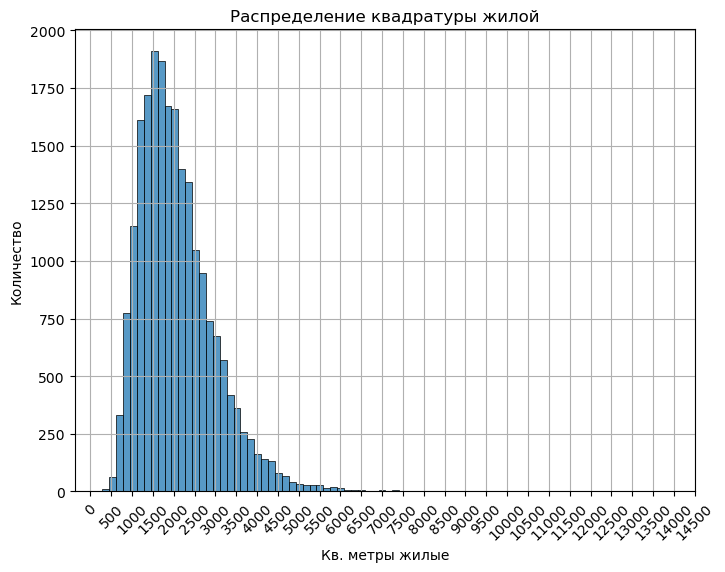

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(df_house['sqft_living'], bins=80)
plt.xlabel('Кв. метры жилые')
plt.ylabel('Количество')
plt.title('Распределение квадратуры жилой')
plt.xticks(range(0,15000,500), rotation=45)
plt.grid(); 

Вывод: у большинства объектов недвижимости жилые квадратных метров варьируются в диапазоне от 750 до 3250. Предсказуем вывод о том, что количество объектов недвижимости с жилыми кв. метрами больше 4000 существенно ниже.

1.4. Изучите распределение года постройки

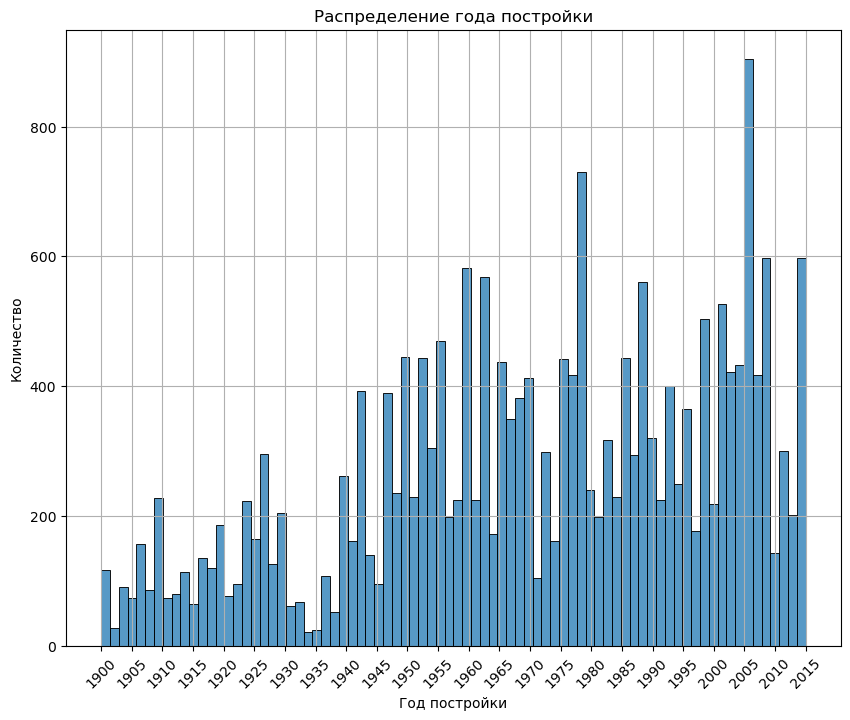

In [27]:
plt.figure(figsize=(10, 8))
sns.histplot(df_house['yr_built'], bins=80)
plt.xlabel('Год постройки')
plt.ylabel('Количество')
plt.title('Распределение года постройки')
plt.xticks(range(1900,2020,5), rotation=45)
plt.grid(); 

Вывод: больше все объектов недвижимости было построено в период между 2005 и 2007 годами.

## Условие 2: 2 задача

2.1. Изучите распределение домов от наличия вида на набережную
- Постройте график
- Сделайте выводы

In [40]:
data = df_house['waterfront'].value_counts()
data

0    21450
1      163
Name: waterfront, dtype: int64

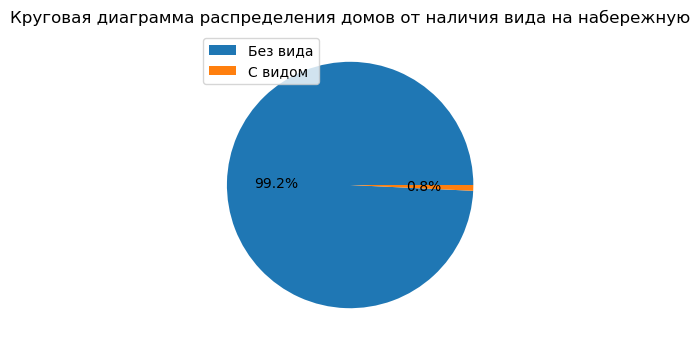

In [41]:
plt.figure(figsize=(6, 4))
plt.pie(data, autopct='%1.1f%%')
plt.title('Круговая диаграмма распределения домов от наличия вида на набережную')
plt.legend(['Без вида', 'С видом']);

Вывод: домов с видов на набережную меньше 1%.

2.2. Изучите распределение этажей домов

In [37]:
data = df_house['floors'].value_counts()
data

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

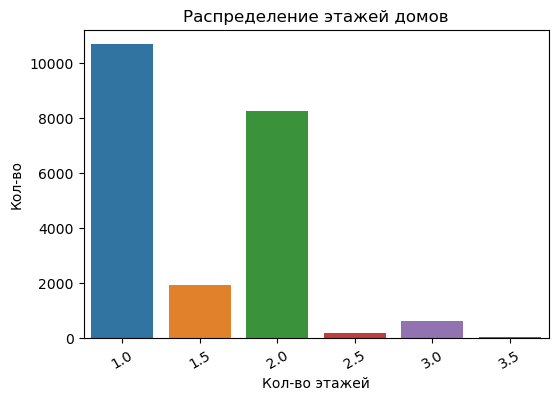

In [39]:
plt.figure(figsize=(6, 4))
sns.barplot(x = data.index, y = data)
plt.title('Распределение этажей домов')
plt.xlabel('Кол-во этажей')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

Вывод: больше всего одноэтажных и двухэтажных домов.

2.3. Изучите распределение состояния домов

In [48]:
data = df_house['condition'].value_counts()
data

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

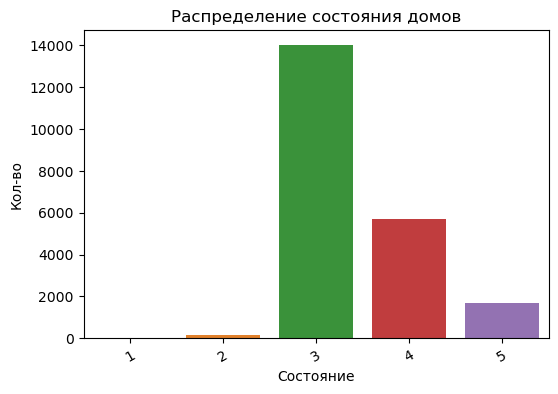

In [49]:
plt.figure(figsize=(6, 4))
sns.barplot(x = data.index, y = data)
plt.title('Распределение состояния домов')
plt.xlabel('Состояние')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

Вывод: больше всего домов в среднем состоянии.

## Условие 3: 3 задача

- Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
- Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

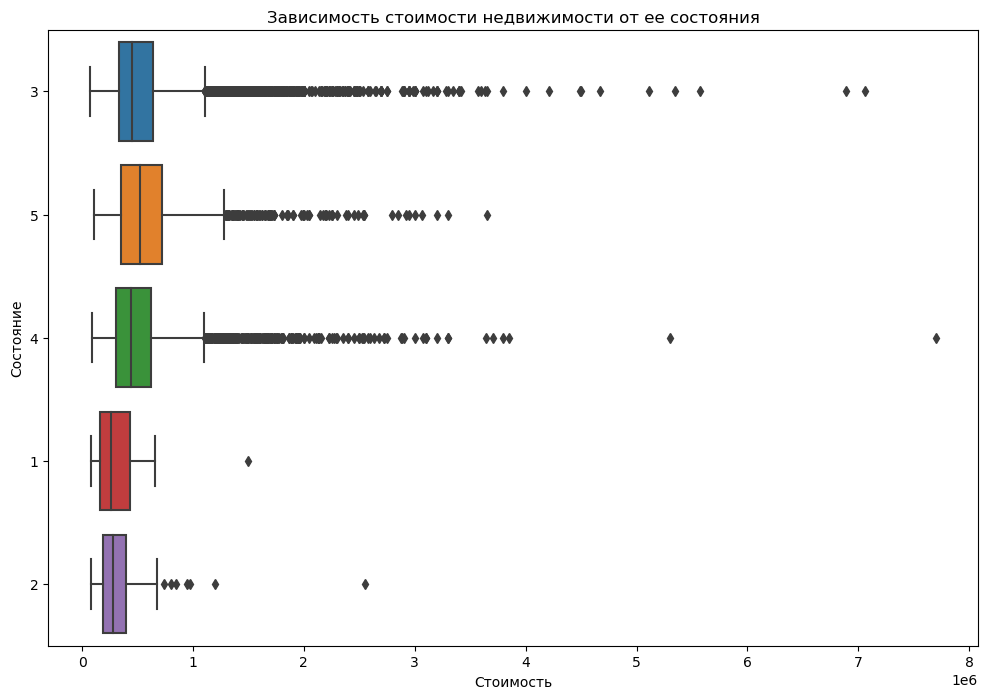

In [53]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df_house['price'], y=df_house['condition'].astype('str'), whis=1.5);
plt.xlabel('Стоимость')
plt.ylabel('Состояние')
plt.title('Зависимость стоимости недвижимости от ее состояния');

In [82]:
data_t = df_house[['price', 'view', 'grade', 'sqft_living', 'bedrooms', 'floors', 'condition']]
data_t

,price,view,grade,sqft_living,bedrooms,floors,condition
0,221900.0,0,7,1180,3,1.0,3
1,538000.0,0,7,2570,3,2.0,3
2,180000.0,0,6,770,2,1.0,3
3,604000.0,0,7,1960,4,1.0,5
4,510000.0,0,8,1680,3,1.0,3
...,...,...,...,...,...,...,...
21608,360000.0,0,8,1530,3,3.0,3
21609,400000.0,0,8,2310,4,2.0,3
21610,402101.0,0,7,1020,2,2.0,3
21611,400000.0,0,8,1600,3,2.0,3


In [83]:
corr_matrix = data_t.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,price,view,grade,sqft_living,bedrooms,floors,condition
price,1.0,0.4,0.7,0.7,0.3,0.3,0.0
view,0.4,1.0,0.3,0.3,0.0,0.0,0.0
grade,0.7,0.3,1.0,0.8,0.4,0.5,0.0
sqft_living,0.7,0.3,0.8,1.0,0.6,0.4,0.0
bedrooms,0.3,0.0,0.4,0.6,1.0,0.0,0.0
floors,0.3,0.0,0.5,0.4,0.0,1.0,-0.3
condition,0.0,0.0,0.0,0.0,0.0,-0.3,1.0


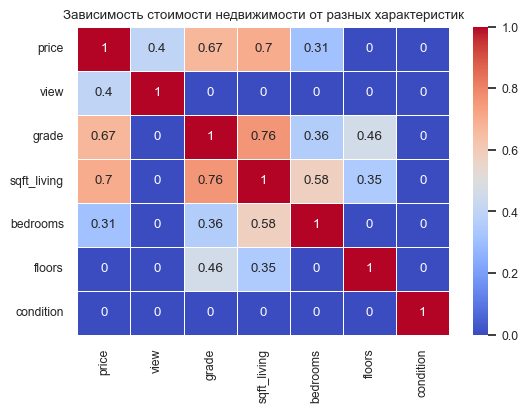

In [88]:
plt.figure(figsize=(6,4))
sns.set(font_scale=.8)
sns.heatmap(corr_m, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Зависимость стоимости недвижимости от разных характеристик');

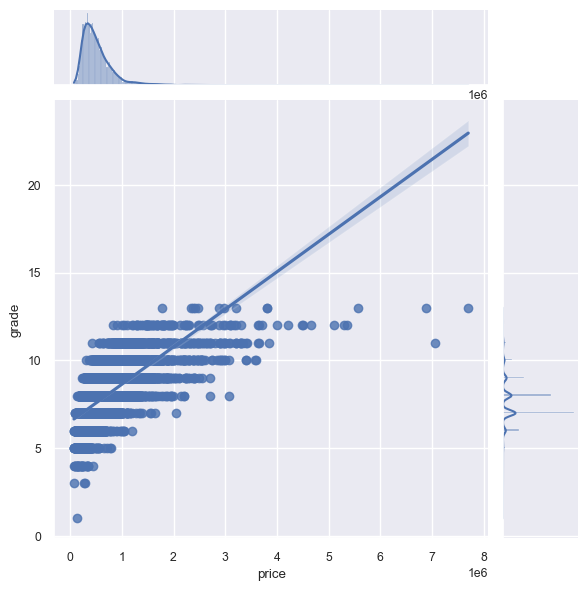

In [96]:
sns.jointplot(x=data_t['price'], y=data_t['grade'], kind='reg');

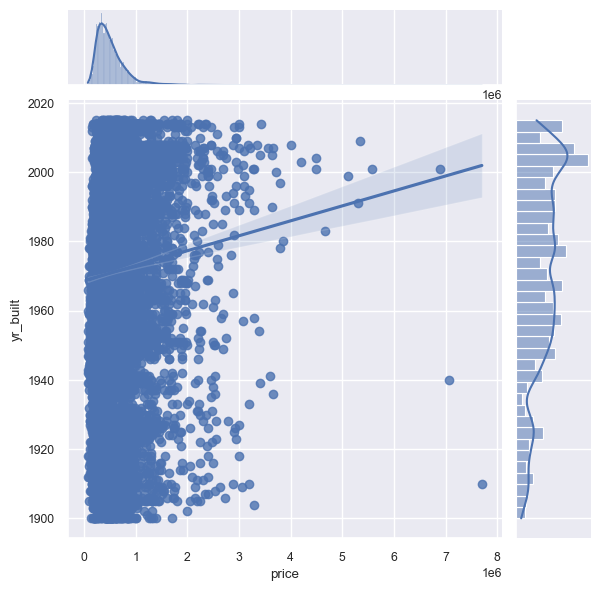

In [98]:
sns.jointplot(x=df_house['price'], y=df_house['yr_built'], kind='reg');

In [124]:
data_c = pd.crosstab(data_t['grade'], data_t['floors'], normalize='index').reset_index().round(2).drop(columns=[1.5, 2.5, 3, 3.5])
data_c

floors,grade,1.0,2.0
0,1,1.00,0.00
1,3,1.00,0.00
2,4,0.93,0.00
3,5,0.83,0.01
4,6,0.82,0.03
5,7,0.66,0.22
6,8,0.37,0.49
7,9,0.17,0.74
8,10,0.13,0.80
9,11,0.09,0.81


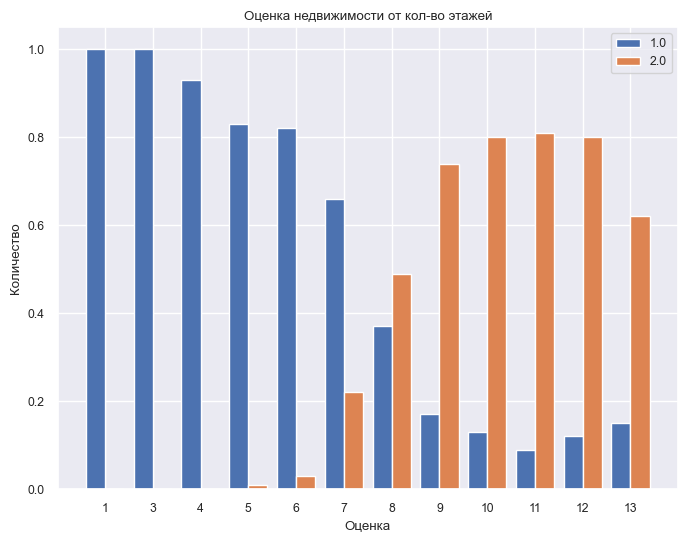

In [128]:
plt.figure(figsize=(8, 6))
n_ticks = np.arange(len(data_c[1.0]))
offset = 0.2
w = 0.4
plt.bar(n_ticks - offset, data_c[1.0], width=w)
plt.bar(n_ticks + offset, data_c[2.0], width=w)
plt.title('Оценка недвижимости от кол-во этажей')
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.legend(['1.0', '2.0'])
plt.xticks(n_ticks, data_c['grade']);

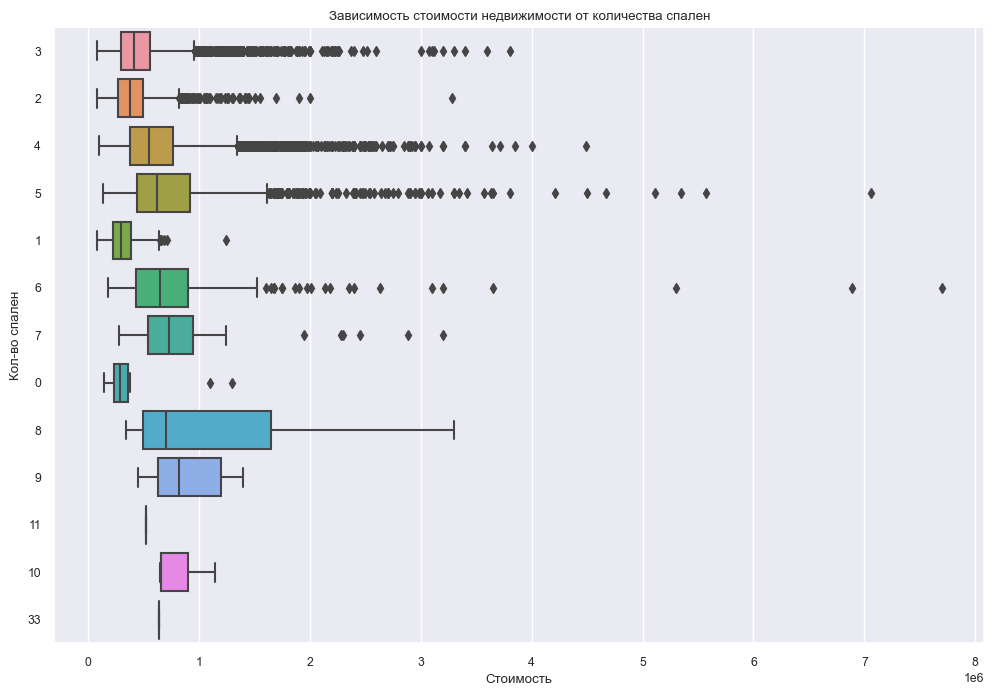

In [131]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df_house['price'], y=df_house['bedrooms'].astype('str'), whis=1.5);
plt.xlabel('Стоимость')
plt.ylabel('Кол-во спален')
plt.title('Зависимость стоимости недвижимости от количества спален');